In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import glob
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from scripts.ais_parsers import discharge_to_csv, level_to_csv

# Parsing

### Levels

In [11]:
file_path = glob.glob('./data/initial_levels/converted_1/*.xlsx')

id_lbl_asso = list()
for f_path in tqdm(file_path):

    id_lbl_asso.append(level_to_csv(data_path=f_path,
                                    from_top=38,
                                    save_path=Path('./data/levels/results/')))
    
temp_df = list()
for record in id_lbl_asso:
    temp_df.append(pd.DataFrame(record).T)
temp_df = pd.concat(temp_df)
temp_df = temp_df.rename(columns={0: 'name',
                                  1: 'height'})
temp_df.to_csv('./data/levels/height_id.csv')

  0%|          | 0/251 [00:00<?, ?it/s]

### Discharge

In [12]:
file_path = glob.glob('./data/initial_discharge/*.xlsx')

id_lbl_asso = list()
for f_path in tqdm(file_path):

    id_lbl_asso.append(
        discharge_to_csv(data_path=f_path,
                         save_path=Path('./data/discharge/results_new/')))


  0%|          | 0/21 [00:00<?, ?it/s]

# Editing

## Discharge

In [3]:
initial_discharge = pd.read_pickle('./data/water_consumption.pkl')

initial_discharge = initial_discharge.rename(columns={'Date':'date'})
initial_discharge = initial_discharge.set_index('date')
initial_discharge.index = pd.to_datetime(initial_discharge.index)
initial_discharge

,49001,49014,49017,49030,49047,49048,49052,49053,49054,49055,...,74412,74443,72727,72467,72477,72641,72680,72740,72751,73208
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,NaN,1.58,15.8,4.40,6.97,NaN,3.67,0.60,0.85,NaN,...,2.74,1.70,4.38,3.04,21.5,60.7,80.8,22.0,0.36,9.20
2008-01-02,NaN,1.55,14.4,4.35,6.94,NaN,3.54,0.62,0.84,NaN,...,2.96,1.48,3.95,2.92,21.5,60.4,76.0,21.1,0.36,9.12
2008-01-03,NaN,1.52,13.5,4.30,6.91,NaN,3.40,0.63,0.83,NaN,...,3.14,0.66,3.53,2.73,21.2,60.2,62.3,20.2,0.36,8.97
2008-01-04,NaN,1.49,12.7,4.25,6.88,NaN,3.26,0.64,0.82,NaN,...,3.44,0.79,3.14,2.54,20.5,59.3,59.9,19.3,0.36,8.56
2008-01-05,NaN,1.47,12.3,4.20,6.85,NaN,3.12,0.65,0.82,NaN,...,3.52,0.77,2.84,2.47,19.8,59.8,48.3,18.5,0.32,8.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,42.0,2.15,12.7,NaN,14.20,9.22,4.68,1.01,1.22,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,44.7,2.15,12.2,NaN,14.10,9.02,4.64,1.01,1.23,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,47.3,2.15,12.0,NaN,14.00,8.83,4.59,1.01,1.23,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
discharge_list = list()

for gauge_id in initial_discharge.columns:

    old_data = initial_discharge.loc[:, [gauge_id]]

    try:
        new_data = pd.read_csv(f'./data/discharge/results/{gauge_id}.csv')
        new_data = new_data[['discharge']]
        new_data = new_data.rename(columns={'discharge': gauge_id})
    except FileNotFoundError:
        new_data = pd.DataFrame(data={gauge_id: [np.NaN] * 366,
                                      'date': pd.date_range(start='01/01/2020',
                                                            end='12/31/2020')})
        new_data = new_data.set_index('date')

    concat_data = pd.concat([old_data, new_data], axis=0).reset_index(drop=True)

    discharge_list.append(concat_data)


In [33]:
discharge = pd.concat(discharge_list, axis=1)
discharge = discharge[:4749]
discharge.index = pd.date_range(start='01/01/2008',
                                end='12/31/2020')
discharge[discharge < 0] = np.NaN
discharge


,49001,49014,49017,49030,49047,49048,49052,49053,49054,49055,...,74412,74443,72727,72467,72477,72641,72680,72740,72751,73208
2008-01-01,NaN,1.58,15.8,4.40,6.97,NaN,3.67,0.60,0.85,NaN,...,2.74,1.70,4.38,3.04,21.5,60.7,80.8,22.0,0.36,9.20
2008-01-02,NaN,1.55,14.4,4.35,6.94,NaN,3.54,0.62,0.84,NaN,...,2.96,1.48,3.95,2.92,21.5,60.4,76.0,21.1,0.36,9.12
2008-01-03,NaN,1.52,13.5,4.30,6.91,NaN,3.40,0.63,0.83,NaN,...,3.14,0.66,3.53,2.73,21.2,60.2,62.3,20.2,0.36,8.97
2008-01-04,NaN,1.49,12.7,4.25,6.88,NaN,3.26,0.64,0.82,NaN,...,3.44,0.79,3.14,2.54,20.5,59.3,59.9,19.3,0.36,8.56
2008-01-05,NaN,1.47,12.3,4.20,6.85,NaN,3.12,0.65,0.82,NaN,...,3.52,0.77,2.84,2.47,19.8,59.8,48.3,18.5,0.32,8.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,40.5,2.40,16.4,11.40,30.30,10.6,6.19,1.33,1.59,28.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,41.0,2.42,16.5,11.40,30.00,10.5,6.22,1.33,1.54,27.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,41.5,2.43,16.6,11.10,29.70,10.4,6.26,1.33,1.50,27.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,42.0,2.45,16.8,11.00,29.40,10.3,6.29,1.32,1.47,26.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Levels

In [23]:
common_cols = levels.columns.intersection(list(map(str, discharge.columns)))

for col in common_cols:

    res_df = pd.DataFrame()
    res_df.index = levels.index
    res_df['level'] = levels[[col]]
    res_df['discharge'] = discharge[[int(col)]]
    
    res_df.to_csv(f'./data/results/{col}.csv')
    
    
    

In [27]:

res_df.index = lvl_data.index
res_df['level'] = lvl_data[[col]]
res_df['discharge'] = q_data[[int(col)]]

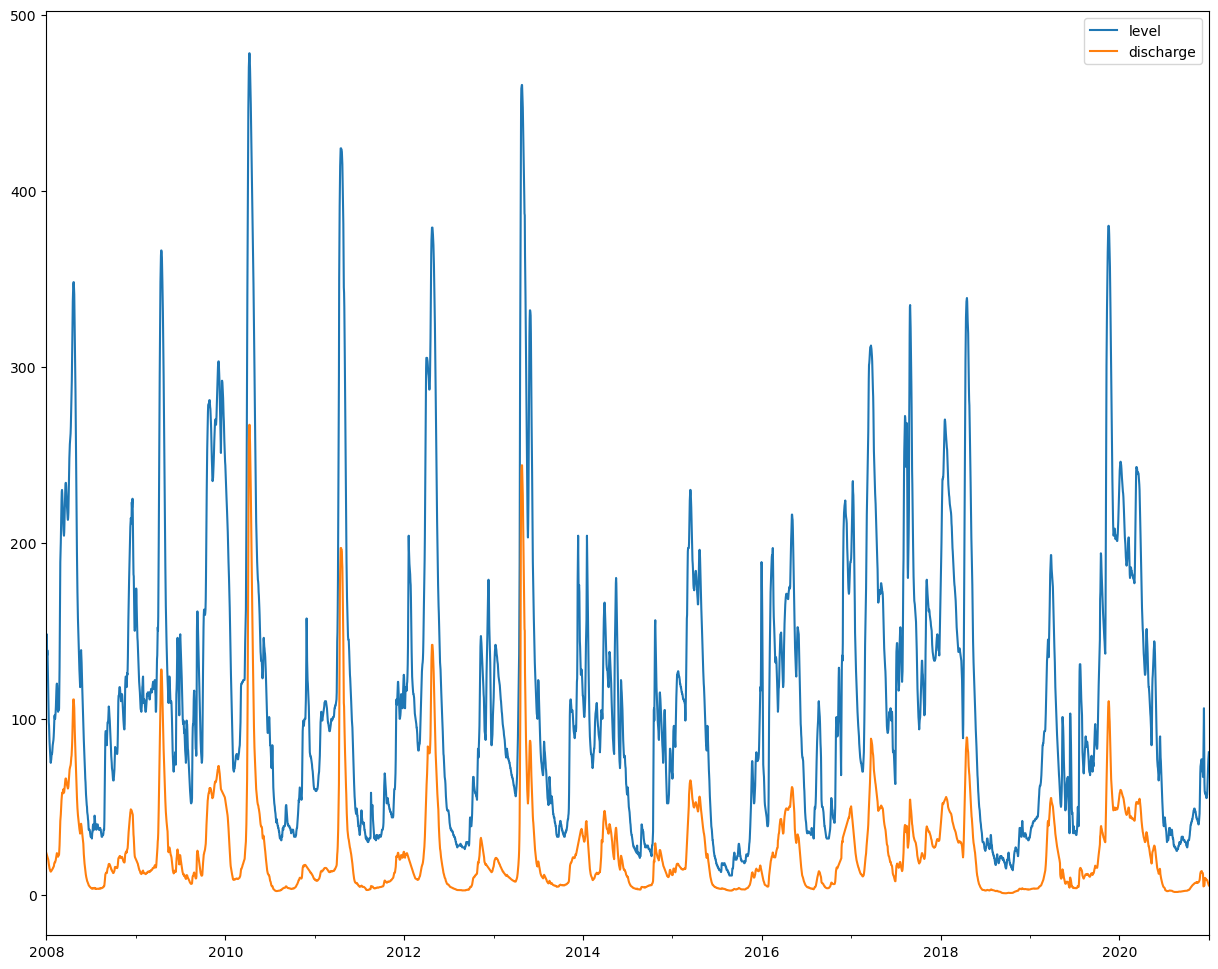

In [30]:
res_df.plot(figsize=(15, 12));

In [24]:
lvl_data

,72682
2008-01-01,124.0
2008-01-02,131.0
2008-01-03,148.0
2008-01-04,136.0
2008-01-05,139.0
...,...
2020-12-27,69.0
2020-12-28,73.0
2020-12-29,77.0
2020-12-30,79.0
